# Credit Card Fraud with Tensorflow. 
Nathan Brasher - 5.11.20

This notebook examines techniques to improve modeling in the [Kaggle credit card fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud) data set. In developing this model, I borrowed from the examples in [this notebook](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets) also stored on Kaggle.

This notebook consists of 3 main sections:
1. EDA
1. Data cleaning and preparation
1. Model fitting
1. Model deployment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Install to read S3, only needs to be done once
!pip install s3fs

  Using cached s3fs-0.4.2-py3-none-any.whl (19 kB)


In [9]:
# Read project data
df = pd.read_csv('s3://udacity-project-fraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Exploratory Data Analysis  

Detail TDB...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Only 0.17% of the data set is fraudulent


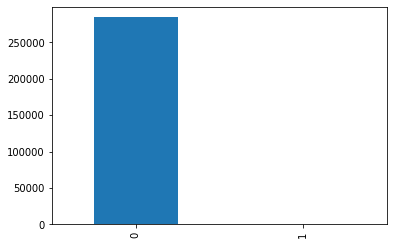

In [10]:
# The data set is heavily imbalanced
print('Only {:.2f}% of the data set is fraudulent'.format(
    100*len(df[df['Class'] == 1]) / len(df)
))

df['Class'].value_counts().plot.bar()
plt.show()

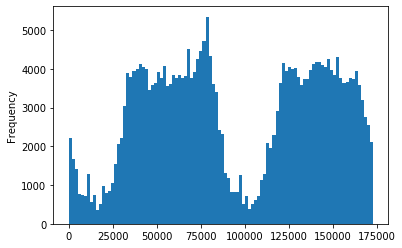

In [12]:
# Transactions are highly cyclical over time
df['Time'].plot.hist(bins=100)
plt.show()

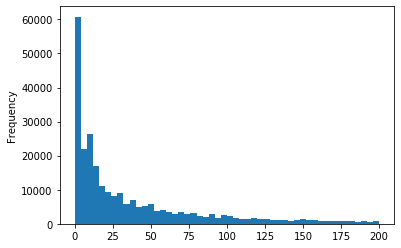

There is a long tail with 28,837 transactions over $200
The maximum transaction is $25,691.16 


In [22]:
# Transaction amount has a long tail with the majority less than $200
df[df['Amount'] < 200]['Amount'].plot.hist(bins=50)
plt.show()

print('There is a long tail with {:,} transactions over $200'.format(
    len(df[df['Amount'] > 200])))
print('The maximum transaction is ${:,.2f} '.format(
    df['Amount'].max()))